# Caida libre

In [2]:
# Importamos a nuestra libreta de trabajo las librerias a utilizar
import tensorflow as tf # libreria para IA desarrollada por google
import numpy as np # para trabajar con números
import matplotlib.pyplot as plt # se importa la libreria matplot para hacer las gráficas
import math

In [5]:
from IPython.display import Image

# Montamos el GDrive
from google.colab import drive
drive.mount('/content/gdrive')

# Ruta de la imagen JPEG
ruta_imagen = 'gdrive/My Drive/Colab Notebooks/RN2023/caidalibre.jpeg'
ruta_imagen1 = 'gdrive/My Drive/Colab Notebooks/RN2023/caidalibre1.jpeg'
ruta_imagen2 = 'gdrive/My Drive/Colab Notebooks/RN2023/caidalibre2.jpeg'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Como se define una caída libre?**
##  ***Un objeto tiene una caída libre si se suelta desde una altura h respecto de la superficie terrestre y no sufre ninguna resistencia originada por el aire o cualquier otra sustancia***

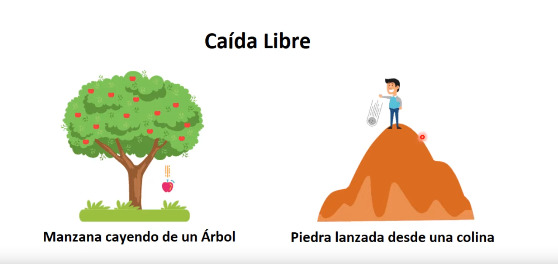

In [ ]:
# Muestra la imagen en la celda
Image(filename=ruta_imagen)

# Entrenamos la neurona con los valores obtenidos con el modelo de caida libre

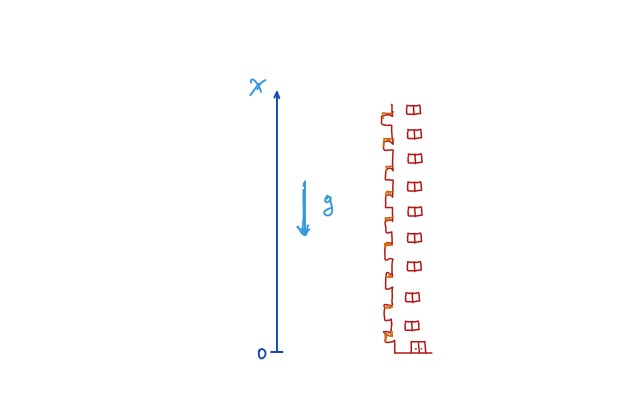

In [ ]:
# Muestra la imagen en la celda
Image(filename=ruta_imagen1)

## Utilizamos las ecuaciones de movimiento para calcular pares (h0,t) que se usarán para entrenar la red neuronal

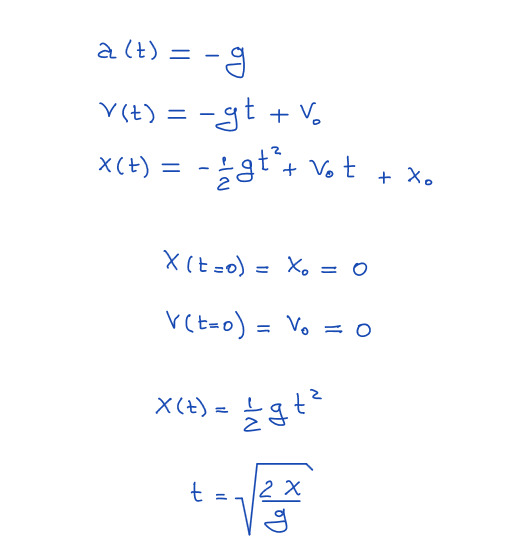

In [ ]:
# Muestra la imagen en la celda
Image(filename=ruta_imagen2)

::### Definimos el Corpus con los valores de $h_{0}$ y t

Dada la relación entre t y $h_{0}$

$$ t= \sqrt(2 h_{0}/g) $$

Definimos un arreglo para h0 y calculamos los t correspondientes

In [6]:

# Generando datos de entrenamiento
h0 = np.random.randint(1, 200, size=(1000,))  # Genera 1000 números aleatorios del 1 al 200

# Definir la aceleración debida a la gravedad (en m/s²)
g = 9.81


# Inicializar un arreglo para almacenar los tiempos
t = np.zeros(len(h0))

# Calcular el tiempo de caída libre para cada altura
for i in range(len(h0)):
    t[i] = np.sqrt((2 * h0[i]) / g)

# Imprimir el arreglo de tiempos
#print("Arreglo de tiempos de caída libre:", t)

print(len(h0))
print(type(h0))

1000
<class 'numpy.ndarray'>


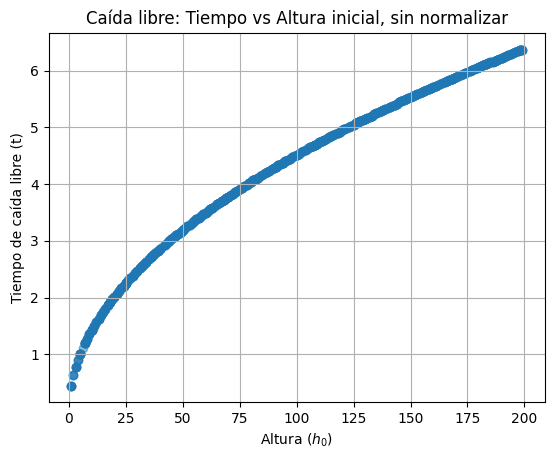

In [7]:

# Graficar h0 versus t
plt.scatter(h0, t, alpha=0.5)
plt.title('Caída libre: Tiempo vs Altura inicial, sin normalizar')
plt.xlabel('Altura ($h_{0}$)')
plt.ylabel('Tiempo de caída libre (t)')
plt.grid(True)
plt.show()


### Normalizamos en el intervalo entre 0 y 1

In [8]:
X_min_val = np.min(h0)  # Calcula el valor mínimo del arreglo de h0.
X_max_val = np.max(h0)  # Calcula el valor máximo del arreglo de h0.

y_min_val = np.min(t)
y_max_val = np.max(t)


print(X_min_val)
print(X_max_val)

print(y_min_val)
print(y_max_val)

1
199
0.4515236409857309
6.369524791963151


In [9]:
def inverse_normalize_data(data, min_val, max_val ):
    return data * (max_val - min_val) + min_val

In [10]:
def normalize_data(data, min_val, max_val ):
    return (data -  min_val) / (max_val -  min_val)

In [11]:
h0Normal = normalize_data(h0, X_min_val, X_max_val)
tNormal  = normalize_data(t, y_min_val, y_max_val)

In [12]:
h0UnNormal = inverse_normalize_data(h0Normal, X_min_val, X_max_val)
tUnNormal  = inverse_normalize_data(tNormal, y_min_val, y_max_val)

### Vamos a usar los valores calculados con el modelo para el corpus y los dividimos en datos de entrenamiento y de validación

 Ahora convertimos listas (llamadas h0Normal y tNormal) en arrays de NumPy (h0_array y t_array). Luego, diviimos estos datos en conjuntos de entrenamiento y validación, el 80% para entrenamiento y el 20% para validación. Para hacer esto, creamos una lista de índices que representan cada dato y los mezcla al azar. Después, utiliza estos índices para seleccionar los datos de entrenamiento y validación de acuerdo a la división establecida.

In [13]:
#import numpy as np
import random

# Convertir listas a arrays de NumPy
h0_array = np.array(h0Normal)
t_array = np.array(tNormal)

split_ratio = 0.8  # 80% de datos de entrenamiento, 20% de datos de validación
data_length = len(h0_array)
split_index = int(data_length * split_ratio)

# Obtener índices aleatorios para la división
indices = list(range(data_length))
random.shuffle(indices)

train_indices = indices[:split_index]
val_indices = indices[split_index:]

# División de datos de acuerdo a los índices aleatorios generados
X_train_split = h0_array[train_indices]
y_train_split = t_array[train_indices]

X_val_split = h0_array[val_indices]
y_val_split = t_array[val_indices]



otros pares h , t

In [ ]:
h = np.array([ 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80])
tiempos = np.array([1.42784312, 1.74874354, 2.01927511, 2.2576182,  2.47309683, 2.67124988, 2.85568625, 3.02891266, 3.19275428, 3.49748708, 3.77771781, 4.03855022])

## Graficamos los t versus $h_{0}$ ya  normalizados
## Usamos los conjuntos de entrenamiento y validación

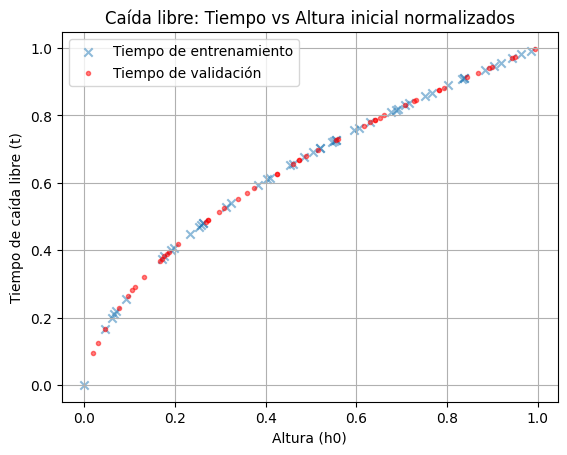

In [14]:
# Graficar h0 versus t normalizados
plt.scatter(X_train_split[:50], y_train_split[:50], marker ='x', alpha=0.5, label='Tiempo de entrenamiento')
plt.scatter(X_val_split[:50], y_val_split[:50], c='r', marker = '.', alpha=0.5,label='Tiempo de validación'  )
plt.title('Caída libre: Tiempo vs Altura inicial normalizados')
plt.xlabel('Altura (h0)')
plt.ylabel('Tiempo de caída libre (t)')
plt.grid(True)
plt.legend()
plt.show()


[1.42784312 1.74874354 2.01927511 2.2576182  2.47309683 2.67124988
 2.85568625 3.02891266 3.19275428]

## Creamos una Capa de un Percetron pero no funciona

In [18]:
# Modelo de red neuronal con una neurona.
# Utilizamos el framework Keras.
# Keras nos permite hacer las redes  neuronales más simples.
# Puedes especificar la capa de entrada y salida o especificar solo la capa de salida.

Mi_capa = tf.keras.layers.Dense(units=1, activation='relu',input_shape=[1])

# capas tipo densa, conecta todas las neuronas entre si aunque en este caso solo hay una neurona, units=unidades o neuronas
#input_shape estamos diciendo que se trata de una capa de entrada con una neurona

print(Mi_capa)

In [19]:
#Modelo secuencial
Mi_modelo = tf.keras.Sequential([model]) # creamos un modelo secuencial, aunque hay de varios tipos.
                                           # Le indicamos la capa que acabamos de crear
print(Mi_modelo)

NameError: ignored

## Creamos una red neuronal de 4 capas y muchas mas neuronas, activación 1 relu y 3 sigmoideas

In [ ]:

# Definición del modelo secuencial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='relu', input_shape=[1]),  # Capa de entrada con activación ReLU
    tf.keras.layers.Dense(units=400, activation='sigmoid'),  # Capa oculta con activación sigmoidea
    tf.keras.layers.Dense(units=400, activation='sigmoid'),  # Capa oculta con activación sigmoidea
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Capa de salida con activación sigmoidea
])

# Resumen del modelo
model.summary()


# Creamos el modelo

In [ ]:
#Modelo secuencial
Mi_modelo = tf.keras.Sequential([model]) # creamos un modelo secuencial, aunque hay de varios tipos.
                                           # Le indicamos la capa que acabamos de crear
print(Mi_modelo)

## Compilamos el modelo

In [ ]:
# COMPILAMOS EL MODELO. Se prepara el modelo para ser entrenado. Se utilizan dos propiedades: optimizador y función de pérdida.
# Optimizador utilizamos el algoritmo de Adams, puedes ver que es en una búsqueda , permite a la red saber como
# ajustar PESOS y SESGOS para ir mejorando

Mi_modelo.compile(
    optimizer=tf.keras.optimizers.Adam(), # "0.1" es la tasa de aprendizaje, si es muy pequeño los ajusta poco a poco, si es muy grande puede tardar mucho
    loss='mean_squared_error' # es la función de pérdida, que utilizamos el error cuadrático medio
)

In [ ]:
# Muestra un resumen de la arquitectura del modelo
Mi_modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1)                 161603    
                                                                 
Total params: 161603 (631.26 KB)
Trainable params: 161603 (631.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Entrenamos el modelo

In [ ]:
# ENTRENAMIENTO DEL MODELO. Se utiliza la función fit, ajuste,
print("Comenzando entrenamiento...")
Mi_historial = Mi_modelo.fit(X_train_split , y_train_split , epochs=500,  validation_data=(X_val_split, y_val_split), verbose=1) #epochs es las vueltas que da el algoritmo, recordamos que tenemos 7 datos, 1 vuelta serían usarlos una vez
print("Modelo entrenado!")

#tenemos que dar muchas vueltas para que optimice lo más posible, se usa el valor 1000 para revisar, aunque se puede csambiar posteriormente


Comenzando entrenamiento...
Epoch 1/500
25/25 [==============================] - 1s 14ms/step - loss: 0.0677 - val_loss: 0.0651
Epoch 2/500
25/25 [==============================] - 0s 7ms/step - loss: 0.0591 - val_loss: 0.0627
Epoch 3/500
25/25 [==============================] - 0s 6ms/step - loss: 0.0529 - val_loss: 0.0541
Epoch 4/500
25/25 [==============================] - 0s 6ms/step - loss: 0.0431 - val_loss: 0.0380
Epoch 5/500
25/25 [==============================] - 0s 6ms/step - loss: 0.0311 - val_loss: 0.0258
Epoch 6/500
25/25 [==============================] - 0s 7ms/step - loss: 0.0162 - val_loss: 0.0119
Epoch 7/500
25/25 [==============================] - 0s 7ms/step - loss: 0.0074 - val_loss: 0.0050
Epoch 8/500
25/25 [==============================] - 0s 6ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 9/500
25/25 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 10/500
25/25 [==============================] - 0s 6ms/step - loss: 0.0016

## Graficamos la función de pérdida

RESULTADO DE LA FUNCIÓN DE PÉRDIDA. Nos informa cuan mal están los resultados en cada vuelta

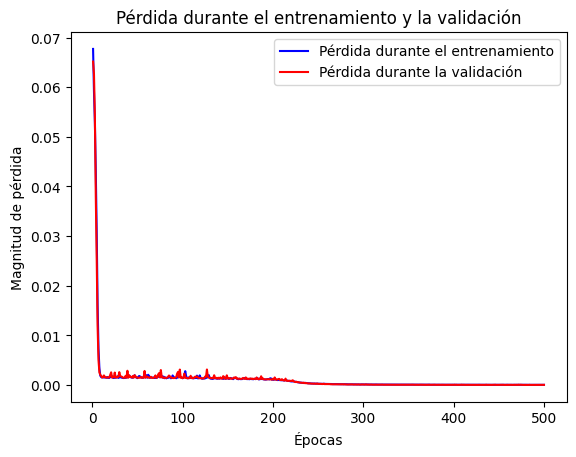

In [ ]:
# Obtener la pérdida y la validación de la pérdida del historial
loss = Mi_historial.history['loss']
val_loss = Mi_historial.history['val_loss']

# Crear un gráfico de la función de pérdida durante el entrenamiento y la validación
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Pérdida durante el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida durante la validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Magnitud de pérdida')
plt.legend()
plt.show()

Variables internas

In [ ]:
# MOSTRANDO LAS VARIABLES INTERNAS DEL MODELO, DE NUESTRA RED NEURONAL

print("Variables internas del modelo")
#print(model.get_weights())

Variables internas del modelo


## Predicción del modelo

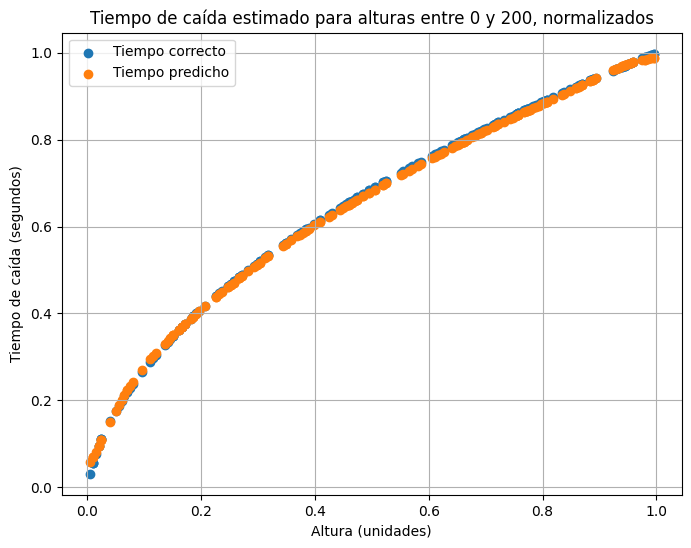

In [ ]:

alturas = X_val_split  #np.linspace(0, 1, 100)  # Alturas de 0 a 100 divididas en 100 puntos
resultados = []

for altura in alturas:
    tiempo_predicho = Mi_modelo.predict([altura], verbose = 0)
#    print(tiempo_predicho, altura, [altura])
    resultados.append(tiempo_predicho[0][0])  # Añade el tiempo predicho a la lista 'resultados'

plt.figure(figsize=(8, 6))
plt.scatter(X_val_split, y_val_split, label='Tiempo correcto')
plt.scatter(alturas, resultados, label='Tiempo predicho')
plt.xlabel('Altura (unidades)')
plt.ylabel('Tiempo de caída (segundos)')
plt.title('Tiempo de caída estimado para alturas entre 0 y 200, normalizados')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
len(y_train_split),len(t)


(800, 1000)

## Hacemos la transformación inversa para obtener el gráfico sin normalizar

In [ ]:
alturas = X_val_split  #np.linspace(0, 1, 100)  # Alturas de 0 a 100 divididas en 100 puntos
resultados_norm = []

for altura in alturas:
    tiempo_predicho = Mi_modelo.predict([altura], verbose = 0)

    resultados_norm.append(tiempo_predicho[0][0])  # Añade el tiempo predicho a la lista 'resultados'

resultados_norm = np.array(resultados_norm)

X_val_pred = inverse_normalize_data(alturas, X_min_val, X_max_val)
y_val_orig = inverse_normalize_data(y_val_split, y_min_val, y_max_val)

y_val_pred = inverse_normalize_data(resultados_norm, y_min_val, y_max_val)

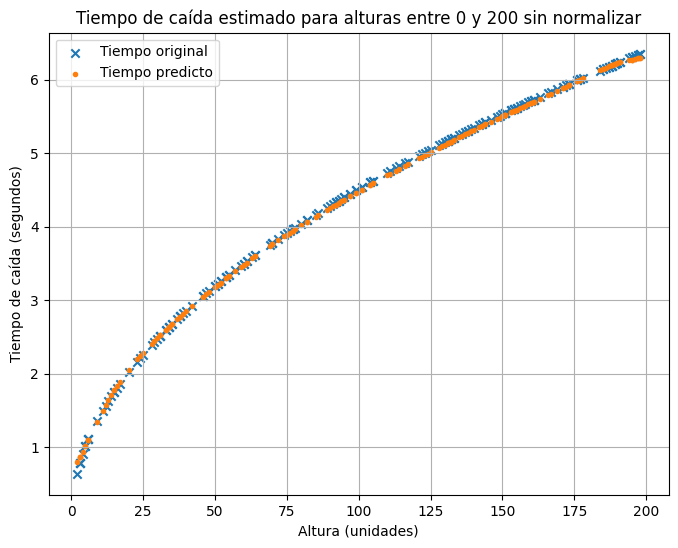

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_val_pred, y_val_orig, marker = 'x', label='Tiempo original')
plt.scatter(X_val_pred, y_val_pred, marker = '.', label='Tiempo predicto')

plt.xlabel('Altura (unidades)')
plt.ylabel('Tiempo de caída (segundos)')
plt.title('Tiempo de caída estimado para alturas entre 0 y 200 sin normalizar')
plt.legend()
plt.grid(True)
plt.show()


## Cambiamos un poco los parámetros del modelo de la neurona
## reducimos el número de neuronas de las capas ocultas y
## el número de épocas y vemos que el ajuste ya no es tan
## bueno

In [21]:

# Definición del modelo secuencial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='relu', input_shape=[1]),  # Capa de entrada con activación ReLU
    tf.keras.layers.Dense(units=250, activation='sigmoid'),  # Capa oculta con activación sigmoidea
    tf.keras.layers.Dense(units=250, activation='sigmoid'),  # Capa oculta con activación sigmoidea
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Capa de salida con activación sigmoidea
])

# Resumen del modelo
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 250)               500       
                                                                 
 dense_8 (Dense)             (None, 250)               62750     
                                                                 
 dense_9 (Dense)             (None, 1)                 251       
                                                                 
Total params: 63503 (248.06 KB)
Trainable params: 63503 (248.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Creamos el modelo y compilamos

In [22]:
#Modelo secuencial
Mi_modelo = tf.keras.Sequential([model]) # creamos un modelo secuencial, aunque hay de varios tipos.
                                           # Le indicamos la capa que acabamos de crear
print(Mi_modelo)

In [23]:
# COMPILAMOS EL MODELO. Se prepara el modelo para ser entrenado. Se utilizan dos propiedades: optimizador y función de pérdida.
# Optimizador utilizamos el algoritmo de Adams, puedes ver que es en una búsqueda , permite a la red saber como
# ajustar PESOS y SESGOS para ir mejorando

Mi_modelo.compile(
    optimizer=tf.keras.optimizers.Adam(), # "0.1" es la tasa de aprendizaje, si es muy pequeño los ajusta poco a poco, si es muy grande puede tardar mucho
    loss='mean_squared_error' # es la función de pérdida, que utilizamos el error cuadrático medio
)


## Ahora entrenamos

In [24]:

# ENTRENAMIENTO DEL MODELO. Se utiliza la función fit, ajuste,
print("Comenzando entrenamiento...")
Mi_historial = Mi_modelo.fit(X_train_split , y_train_split , epochs=500,  validation_data=(X_val_split, y_val_split), verbose=1) #epochs es las vueltas que da el algoritmo, recordamos que tenemos 7 datos, 1 vuelta serían usarlos una vez
print("Modelo entrenado!")

#tenemos que dar muchas vueltas para que optimice lo más posible, se usa el valor 1000 para revisar, aunque se puede csambiar posteriormente

Comenzando entrenamiento...
Epoch 1/500
25/25 [==============================] - 2s 18ms/step - loss: 0.0744 - val_loss: 0.0686
Epoch 2/500
25/25 [==============================] - 0s 8ms/step - loss: 0.0660 - val_loss: 0.0605
Epoch 3/500
25/25 [==============================] - 0s 7ms/step - loss: 0.0647 - val_loss: 0.0614
Epoch 4/500
25/25 [==============================] - 0s 7ms/step - loss: 0.0632 - val_loss: 0.0562
Epoch 5/500
25/25 [==============================] - 0s 7ms/step - loss: 0.0575 - val_loss: 0.0561
Epoch 6/500
25/25 [==============================] - 0s 7ms/step - loss: 0.0520 - val_loss: 0.0470
Epoch 7/500
25/25 [==============================] - 0s 9ms/step - loss: 0.0477 - val_loss: 0.0394
Epoch 8/500
25/25 [==============================] - 0s 8ms/step - loss: 0.0368 - val_loss: 0.0325
Epoch 9/500
25/25 [==============================] - 0s 7ms/step - loss: 0.0267 - val_loss: 0.0194
Epoch 10/500
25/25 [==============================] - 0s 7ms/step - loss: 0.0158

Queremos comparar los aproximados con resultados exactos

In [ ]:
h = [ 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80]
tiempos = [1.42784312, 1.74874354, 2.01927511, 2.2576182,  2.47309683, 2.67124988, 2.85568625, 3.02891266, 3.19275428, 3.49748708, 3.77771781, 4.03855022]

## Graficar la función de pérdida de los conjuntos de entrenamiento y validación




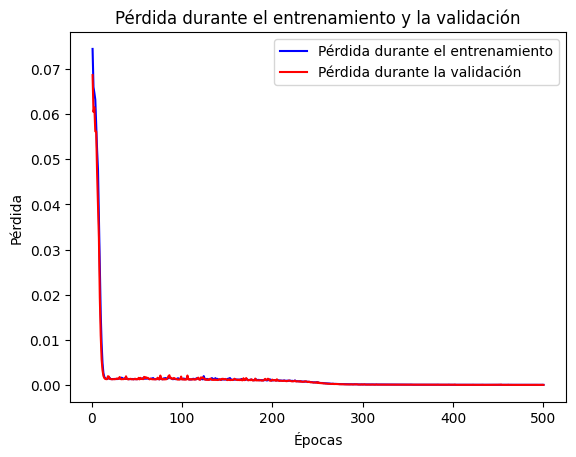

In [25]:
# Obtener la pérdida y la validación de la pérdida del historial
loss = Mi_historial.history['loss']
val_loss = Mi_historial.history['val_loss']

# Crear un gráfico de la función de pérdida durante el entrenamiento y la validación
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Pérdida durante el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida durante la validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

## Predicción del modelo

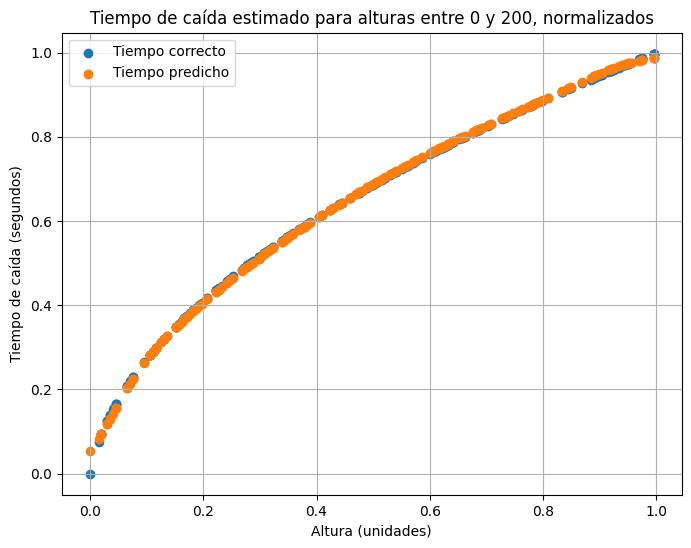

In [26]:

alturas = X_val_split  #np.linspace(0, 1, 100)  # Alturas de 0 a 100 divididas en 100 puntos
resultados = []

for altura in alturas:
    tiempo_predicho = Mi_modelo.predict([altura], verbose = 0)
 #   print(tiempo_predicho, altura, [altura])
    resultados.append(tiempo_predicho[0][0])  # Añade el tiempo predicho a la lista 'resultados'

plt.figure(figsize=(8, 6))
plt.scatter(X_val_split, y_val_split, label='Tiempo correcto')
plt.scatter(alturas, resultados, label='Tiempo predicho')
plt.xlabel('Altura (unidades)')
plt.ylabel('Tiempo de caída (segundos)')
plt.title('Tiempo de caída estimado para alturas entre 0 y 200, normalizados')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
#print(resultados_norm)
type(resultados)
len(resultados)

200

## Hacemos la transformación inversa para obtener el gráfico sin normalizar

In [28]:
alturas = X_val_split  #np.linspace(0, 1, 100)  # Alturas de 0 a 100 divididas en 100 puntos
resultados_norm = []

for altura in alturas:
    tiempo_predicho = Mi_modelo.predict([altura], verbose = 0)

    resultados_norm.append(tiempo_predicho[0][0])  # Añade el tiempo predicho a la lista 'resultados'

resultados_norm = np.array(resultados_norm)

X_val_pred = inverse_normalize_data(alturas, X_min_val, X_max_val)
y_val_orig = inverse_normalize_data(y_val_split, y_min_val, y_max_val)

y_val_pred = inverse_normalize_data(resultados_norm, y_min_val, y_max_val)

In [ ]:
print(y_min_val)
print(y_max_val)


0.4515236409857309
6.369524791963151


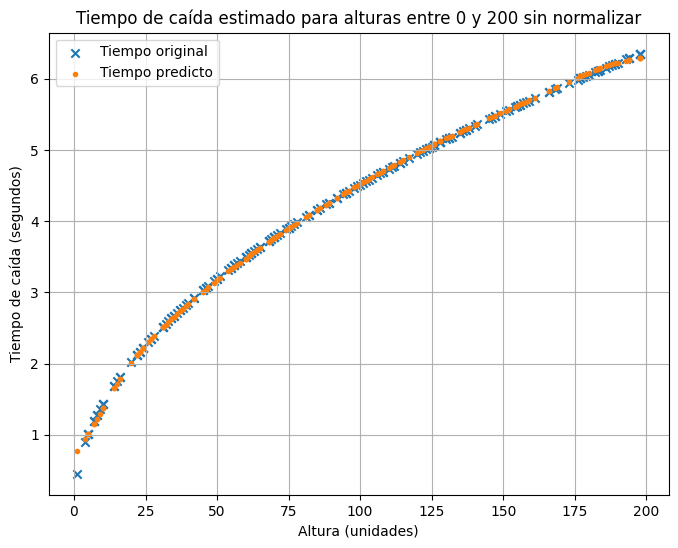

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(X_val_pred, y_val_orig, marker = 'x', label='Tiempo original')
plt.scatter(X_val_pred, y_val_pred, marker = '.', label='Tiempo predicto')
#plt.scatter(alturas, resultados_norm, label='Tiempo predicho')
plt.xlabel('Altura (unidades)')
plt.ylabel('Tiempo de caída (segundos)')
plt.title('Tiempo de caída estimado para alturas entre 0 y 200 sin normalizar')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
def inverse_normalize_data(data_normalized, min_val, max_val ):
    return data_normalized * (max_val - min_val) + min_val

In [ ]:
type(resultados_norm)

numpy.ndarray

In [ ]:
print(resultados_norm)

[0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612, 0.6513612